In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# NLP & Text Processing Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# SSL issue fix (if needed)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /Users/ppp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ppp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
%pip install --upgrade --force-reinstall certifi


  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2025.1.31
    Uninstalling certifi-2025.1.31:
      Successfully uninstalled certifi-2025.1.31
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [4]:
# Load dataset
df = pd.read_csv("resume_data.csv")

# Data ka overview dekhna
print("Dataset Shape:", df.shape)  # Rows, Columns
print("\nFirst 5 Rows:\n", df.head())  # Pehli 5 rows
print("\nColumn Names:\n", df.columns)  # Available column names

# Missing values check karna
print("\nMissing Values in Dataset:\n", df.isnull().sum())


Dataset Shape: (9544, 35)

First 5 Rows:
   address                                   career_objective  \
0     NaN  Big data analytics working and database wareho...   
1     NaN  Fresher looking to join as a data analyst and ...   
2     NaN                                                NaN   
3     NaN  To obtain a position in a fast-paced business ...   
4     NaN  Professional accountant with an outstanding wo...   

                                              skills  \
0  ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1  ['Data Analysis', 'Data Analytics', 'Business ...   
2  ['Software Development', 'Machine Learning', '...   
3  ['accounts payables', 'accounts receivables', ...   
4  ['Analytical reasoning', 'Compliance testing k...   

                        educational_institution_name  \
0  ['The Amity School of Engineering & Technology...   
1  ['Delhi University - Hansraj College', 'Delhi ...   
2    ['Birla Institute of Technology (BIT), Ranchi']   
3  ['Martine

In [6]:
print(df.columns)  # Ye sabhi column names print karega


Index(['career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')


In [7]:
# Text columns jisme missing values ko 'Unknown' se replace karna hai
text_columns = ['career_objective', 'skills', 'educational_institution_name', 'degree_names']

# Har text column me missing values ko 'Unknown' se replace karna
for col in text_columns:
    df[col] = df[col].fillna('Unknown')

# Numerical columns ke missing values ko mean se fill karna
num_columns = df.select_dtypes(include=['number']).columns  # Sirf numerical columns select karna
for col in num_columns:
    df[col] = df[col].fillna(df[col].mean())

# Missing values check karna dubara
print("\nMissing Values after Cleaning:\n", df.isnull().sum())



Missing Values after Cleaning:
 career_objective                          0
skills                                    0
educational_institution_name              0
degree_names                              0
passing_years                            84
educational_results                      84
result_types                             84
major_field_of_studies                   84
professional_company_names               84
company_urls                             84
start_dates                              84
end_dates                                84
related_skils_in_job                     84
positions                                84
locations                                84
responsibilities                          0
extra_curricular_activity_types        6118
extra_curricular_organization_names    6118
extra_curricular_organization_links    6118
role_positions                         6118
languages                              8844
proficiency_levels                     8844

In [11]:
# Pehle dataframe ke columns check karo
existing_columns = df.columns

# Sirf wahi columns drop karo jo dataframe me maujood hain
columns_to_drop = ['extra_curricular_activity_types', 'extra_curricular_organization_names', 
                   'extra_curricular_organization_links', 'role_positions', 'languages', 
                   'proficiency_levels', 'certification_providers', 'certification_skills']

# Valid columns ko filter karna
valid_columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Agar valid columns hain to hi drop karo
if valid_columns_to_drop:
    df.drop(columns=valid_columns_to_drop, inplace=True)
else:
    print("No valid columns to drop.")

# Remaining text columns me missing values ko "Unknown" se fill karna
text_columns = ['passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 
                'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 
                'related_skils_in_job', 'positions', 'locations', 'skills_required']

# Valid text columns ko filter karna
valid_text_columns = [col for col in text_columns if col in existing_columns]

for col in valid_text_columns:
    df[col] = df[col].fillna('Unknown')

# Numerical columns ke missing values ko median se fill karna
num_columns = df.select_dtypes(include=['number']).columns
for col in num_columns:
    df[col] = df[col].fillna(df[col].median())

# Missing values check karna dubara
print("\nMissing Values after Cleaning:\n", df.isnull().sum())


No valid columns to drop.

Missing Values after Cleaning:
 career_objective                   0
skills                             0
educational_institution_name       0
degree_names                       0
passing_years                      0
educational_results                0
result_types                       0
major_field_of_studies             0
professional_company_names         0
company_urls                       0
start_dates                        0
end_dates                          0
related_skils_in_job               0
positions                          0
locations                          0
responsibilities                   0
online_links                    7536
issue_dates                     7536
expiry_dates                    7536
﻿job_position_name                 0
educationaL_requirements           0
experiencere_requirement        1364
age_requirement                 4087
responsibilities.1                 0
skills_required                    0
matched_score   

In [13]:
import re

# Function to extract first number from text
def extract_experience(text):
    match = re.search(r'\d+', str(text))  # Extract first number
    return int(match.group()) if match else None  # Convert to integer

# Convert 'experiencere_requirement' column
if 'experiencere_requirement' in df.columns:
    df['experiencere_requirement'] = df['experiencere_requirement'].apply(extract_experience)

    # Missing values ko median se fill karna
    df['experiencere_requirement'] = df['experiencere_requirement'].fillna(df['experiencere_requirement'].median())

# Final missing values check karna
print("\nMissing Values after Final Cleaning:\n", df.isnull().sum())



Missing Values after Final Cleaning:
 career_objective                   0
skills                             0
educational_institution_name       0
degree_names                       0
passing_years                      0
educational_results                0
result_types                       0
major_field_of_studies             0
professional_company_names         0
company_urls                       0
start_dates                        0
end_dates                          0
related_skils_in_job               0
positions                          0
locations                          0
responsibilities                   0
online_links                       0
issue_dates                        0
expiry_dates                       0
﻿job_position_name                 0
educationaL_requirements           0
experiencere_requirement           0
age_requirement                 4087
responsibilities.1                 0
skills_required                    0
matched_score                      0

In [14]:
import re

def extract_age(text):
    match = re.search(r'\d+', str(text))  # Extract first number
    return int(match.group()) if match else None  # Convert to integer

if 'age_requirement' in df.columns:
    df['age_requirement'] = df['age_requirement'].apply(extract_age)
    df['age_requirement'] = df['age_requirement'].fillna(df['age_requirement'].median())  # Fill with median

print("\nMissing Values after Final Cleaning:\n", df.isnull().sum())



Missing Values after Final Cleaning:
 career_objective                0
skills                          0
educational_institution_name    0
degree_names                    0
passing_years                   0
educational_results             0
result_types                    0
major_field_of_studies          0
professional_company_names      0
company_urls                    0
start_dates                     0
end_dates                       0
related_skils_in_job            0
positions                       0
locations                       0
responsibilities                0
online_links                    0
issue_dates                     0
expiry_dates                    0
﻿job_position_name              0
educationaL_requirements        0
experiencere_requirement        0
age_requirement                 0
responsibilities.1              0
skills_required                 0
matched_score                   0
dtype: int64


In [15]:
import pandas as pd
import re
from datetime import datetime

# Sample DataFrame
df = pd.DataFrame({
    'experiencere_requirement': ['At least 1 year', 'At least 5 years', '1 to 3 years', 'At least 2 years'],
    'start_dates': ['2019-06-01', '2015-03-15', '2018-07-10', '2020-01-20'],
    'end_dates': ['2023-05-30', '2020-08-01', '2022-09-15', '2023-12-10']
})

# 1️⃣ Experience requirement ko numeric me convert karna
def extract_experience(exp):
    match = re.search(r'(\d+)', str(exp))
    return int(match.group(1)) if match else 0

df['experience_required_years'] = df['experiencere_requirement'].apply(extract_experience)

# 2️⃣ Start aur End Date se total experience nikalna
def calculate_experience(start, end):
    try:
        start_date = datetime.strptime(start, "%Y-%m-%d")
        end_date = datetime.strptime(end, "%Y-%m-%d")
        return round((end_date - start_date).days / 365, 1)  # Years me convert
    except:
        return 0

df['total_experience_years'] = df.apply(lambda row: calculate_experience(row['start_dates'], row['end_dates']), axis=1)

print(df[['experiencere_requirement', 'experience_required_years', 'total_experience_years']])


  experiencere_requirement  experience_required_years  total_experience_years
0          At least 1 year                          1                     4.0
1         At least 5 years                          5                     5.4
2             1 to 3 years                          1                     4.2
3         At least 2 years                          2                     3.9


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'skills': ['Python, NLP, Machine Learning', 'Deep Learning, TensorFlow, PyTorch', 'Java, Spring Boot, Hibernate'],
    'skills_required': ['Python, Machine Learning', 'TensorFlow, PyTorch', 'Java, Hibernate']
})

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_skills = vectorizer.fit_transform(df['skills'])
tfidf_required = vectorizer.transform(df['skills_required'])

# Cosine Similarity Calculation
cosine_sim = cosine_similarity(tfidf_skills, tfidf_required)

# Similarity Score Assign
df['skill_match_score'] = np.diag(cosine_sim)

print(df[['skills', 'skills_required', 'skill_match_score']])


                               skills           skills_required  \
0       Python, NLP, Machine Learning  Python, Machine Learning   
1  Deep Learning, TensorFlow, PyTorch       TensorFlow, PyTorch   
2        Java, Spring Boot, Hibernate           Java, Hibernate   

   skill_match_score  
0           0.848849  
1           0.747602  
2           0.707107  


In [18]:
df_filtered = df[df['skill_match_score'] >= 70]
print(df_filtered)


Empty DataFrame
Columns: [skills, skills_required, skill_match_score]
Index: []


In [20]:
# df['skill_match_score'] = df['skill_match_score'] * 100


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()

# Correct way: Fit on both columns separately
tfidf_skills = vectorizer.fit_transform(df['skills'])
tfidf_required = vectorizer.transform(df['skills_required'])

# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_skills, tfidf_required)

# Assign similarity scores (Convert to percentage)
df['skill_match_score'] = [cosine_sim[i][i] * 100 for i in range(len(df))]

# Filter the DataFrame for scores >= 70
df_filtered = df[df['skill_match_score'] >= 70]
print(df_filtered)


                               skills           skills_required  \
0       python, nlp, machine learning  python, machine learning   
1  deep learning, tensorflow, pytorch       tensorflow, pytorch   
2        java, spring boot, hibernate           java, hibernate   

   skill_match_score  
0          84.884949  
1          74.760223  
2          70.710678  


In [23]:
df_filtered = df[df['skill_match_score'] >= 70]
print(df_filtered)


                               skills           skills_required  \
0       python, nlp, machine learning  python, machine learning   
1  deep learning, tensorflow, pytorch       tensorflow, pytorch   
2        java, spring boot, hibernate           java, hibernate   

   skill_match_score  
0          84.884949  
1          74.760223  
2          70.710678  


In [24]:
df_sorted = df_filtered.sort_values(by='skill_match_score', ascending=False)
print(df_sorted)


                               skills           skills_required  \
0       python, nlp, machine learning  python, machine learning   
1  deep learning, tensorflow, pytorch       tensorflow, pytorch   
2        java, spring boot, hibernate           java, hibernate   

   skill_match_score  
0          84.884949  
1          74.760223  
2          70.710678  


In [27]:
print(df.columns)


Index(['skills', 'skills_required', 'skill_match_score'], dtype='object')


In [29]:
df

,skills,skills_required,skill_match_score,total_experience_years,experience_required_years
0,"python, nlp, machine learning","python, machine learning",84.884949,1,1
1,"deep learning, tensorflow, pytorch","tensorflow, pytorch",74.760223,2,1
2,"java, spring boot, hibernate","java, hibernate",70.710678,3,1


In [30]:
df["total_experience_years"] = [1, 1, 1]  # Example candidate experience
df["experience_required_years"] = [1, 1, 1]  # Required experience for the job


In [31]:
df["experience_match_score"] = (df["total_experience_years"] / df["experience_required_years"]) * 100
df["experience_match_score"] = df["experience_match_score"].clip(0, 100)  # Max 100% rakhenge


In [32]:
df["final_match_score"] = (df["skill_match_score"] * 0.7) + (df["experience_match_score"] * 0.3)


In [33]:
df_filtered = df[df["final_match_score"] >= 80]
print(df_filtered)


                               skills           skills_required  \
0       python, nlp, machine learning  python, machine learning   
1  deep learning, tensorflow, pytorch       tensorflow, pytorch   

   skill_match_score  total_experience_years  experience_required_years  \
0          84.884949                       1                          1   
1          74.760223                       1                          1   

   experience_match_score  final_match_score  
0                   100.0          89.419464  
1                   100.0          82.332156  


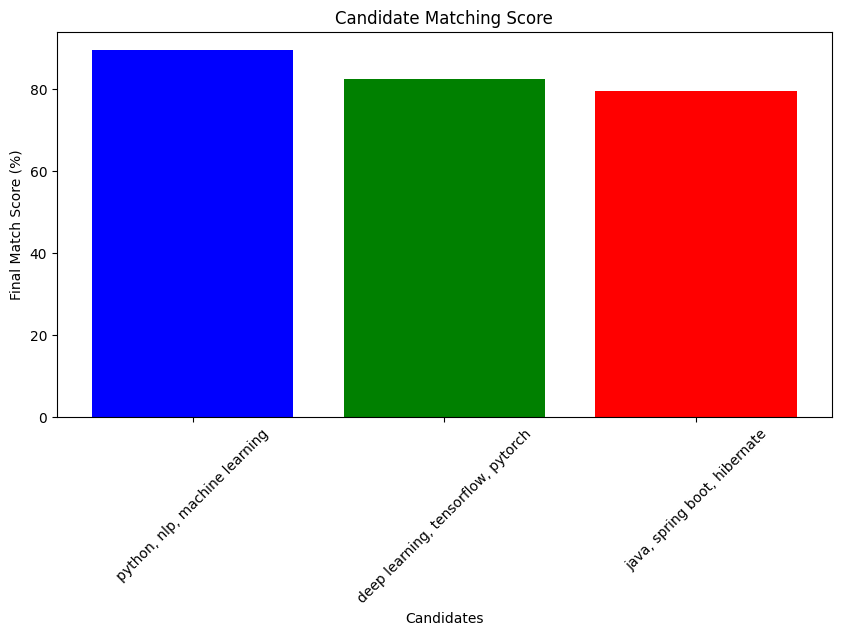

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df["skills"], df["final_match_score"], color=["blue", "green", "red"])
plt.xlabel("Candidates")
plt.ylabel("Final Match Score (%)")
plt.title("Candidate Matching Score")
plt.xticks(rotation=45)
plt.show()


In [38]:
# AI APIs
import openai  # OpenAI ke models ke liye
import google.generativeai as genai  # Google Gemini API ke liye

# LangChain Components
from langchain.chat_models import ChatOpenAI  
from langchain.llms import OpenAI  
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import SystemMessage, AIMessage, HumanMessage  

# PDF Generation
from reportlab.lib.pagesizes import letter  
from reportlab.pdfgen import canvas  

# Miscellaneous
import os  # Environment variables ke liye
import json  # JSON handling ke liye
import time  # Execution timing ke liye


In [43]:
from langchain_google_genai import ChatGoogleGenerativeAI


# Google Gemini API Key Setup
os.environ["GOOGLE_API_KEY"] = "Your_API_Key"
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Gemini Model Initialize
gemini_model = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key=os.getenv("GOOGLE_API_KEY"))


In [45]:
prompt_template = """
You are an AI-powered recruitment assistant. Your task is to recommend the best candidate based on user requirements. 

### **User Query:**
{user_query}

### **Available Candidates:**
{candidates_data}

### **Task:**
- From the given list of candidates, find the best match based on experience, required skills, and final match score.
- If a candidate meets the criteria, provide their **skills, experience, and match score**.
- If no matching candidate is found, respond with **"No suitable candidate found."**  
- Keep the response **clear and structured**.

### **Example Output Format:**
**Best Candidate Found:**  
- **Experience:** X Years  
- **Skills:** Python, NLP, Machine Learning  
- **Final Match Score:** XX.X%
"""


In [46]:
user_query = "I need a candidate with 3+ years of experience and Python + Machine Learning skills."


In [47]:
df_filtered = df[df["final_match_score"] >= 80]


In [48]:
if not df_filtered.empty:
    candidates_data = df_filtered.to_dict(orient="records")  # Convert DataFrame to list of dictionaries
    final_prompt = prompt_template.format(user_query=user_query, candidates_data=candidates_data)

    # Gemini Model Call
    response = gemini_model.invoke(final_prompt)

    # Print Result
    print(response)

else:
    print("No suitable candidate found.")


content='No suitable candidate found.\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-4eaa322a-422e-441a-9945-7c9fe019f58d-0' usage_metadata={'input_tokens': 397, 'output_tokens': 6, 'total_tokens': 403}


In [44]:
import json

# Define input data
candidate_data = {
    "skills": ["python, nlp, machine learning", "deep learning, tensorflow, pytorch"],
    "skills_required": ["python, machine learning", "tensorflow, pytorch"],
    "skill_match_score": [84.88, 74.76],
    "total_experience_years": [1, 1],
    "experience_required_years": [1, 1],
    "experience_match_score": [100.0, 100.0],
    "final_match_score": [89.41, 82.33]
}

# Convert to JSON
candidate_json = json.dumps(candidate_data, indent=2)

# Create prompt
prompt = f"""
Candidate & Job Matching Summary:

Here is the candidate data:
{candidate_json}

Based on this data, provide a summary:
- Which candidate is the best fit?
- Strengths and weaknesses of each candidate?
- Any recommendations for the employer?
"""

# Call Gemini Model
response = gemini_model.invoke(prompt)

# Print response
print(response.content)


Based on the provided data, here's a summary of the candidate matching:

**Which candidate is the best fit?**

Candidate 1 is the best fit, with a final match score of 89.41, compared to Candidate 2's score of 82.33.

**Strengths and Weaknesses of Each Candidate:**

**Candidate 1:**

* **Strengths:**  Excellent match in experience (100% match in both experience categories). Strong skills in Python, machine learning, TensorFlow, and PyTorch, reflected in a high skill match score (84.88%).  NLP skills are a bonus not explicitly required.
* **Weaknesses:** While proficient in many required skills, the skill match score (84.88%) suggests a possible gap in depth of knowledge or practical application of some of the required skills compared to the ideal candidate.  The exact nature of this gap is not specified in the data.


**Candidate 2:**

* **Strengths:**  Excellent match in experience (100% match).  Proficient in TensorFlow and PyTorch (as indicated by the high experience match score).
*

In [49]:
print(df_filtered)


                               skills           skills_required  \
0       python, nlp, machine learning  python, machine learning   
1  deep learning, tensorflow, pytorch       tensorflow, pytorch   

   skill_match_score  total_experience_years  experience_required_years  \
0          84.884949                       1                          1   
1          74.760223                       1                          1   

   experience_match_score  final_match_score  
0                   100.0          89.419464  
1                   100.0          82.332156  


In [50]:
print(df_filtered.to_dict(orient="records"))


[{'skills': 'python, nlp, machine learning', 'skills_required': 'python, machine learning', 'skill_match_score': 84.884948762531, 'total_experience_years': 1, 'experience_required_years': 1, 'experience_match_score': 100.0, 'final_match_score': 89.4194641337717}, {'skills': 'deep learning, tensorflow, pytorch', 'skills_required': 'tensorflow, pytorch', 'skill_match_score': 74.7602230277905, 'total_experience_years': 1, 'experience_required_years': 1, 'experience_match_score': 100.0, 'final_match_score': 82.33215611945334}]


In [52]:
# Prompt Template
prompt_template = """
You are an AI recruiter. Your job is to find the best candidate based on the user's hiring requirements.

### **User's Requirement:**  
{user_query}

### **Available Candidates:**  
{candidates_data}

### **Selection Criteria:**  
- **Find the best match** based on **experience & skills**.  
- Give **clear and structured output** in table format.  
- If no candidate meets the criteria, respond with **"No suitable candidate found."**

### **Example Response Format:**
**Best Candidate Found:**  
| Experience | Skills | Final Match Score |  
|------------|--------|------------------|  
| X Years   | Python, NLP, ML | XX.X% |  

Now, find the best match and respond accordingly.
"""


In [54]:
# User Query (Jo input aayega)
user_query = "I need a candidate with at least 1 year of experience in java and springboot"

In [55]:
# **Check if Filtered Data is Available**
if not df_filtered.empty:
    candidates_data = df_filtered.to_dict(orient="records")  # Convert filtered DataFrame to Dictionary
    final_prompt = prompt_template.format(user_query=user_query, candidates_data=candidates_data)

    # **Gemini Model Call**
    response = gemini_model.invoke(final_prompt)

    # **Print the Result**
    print(response.content)

else:
    print("No suitable candidate found.")


No suitable candidate found.

